Please read the previous two notebooks first!

We have now gone over all the important parameters. All that is left to do is get the BOB waveform!

Here we will create BOB for the News based on a SXS equal mass and non-spinning case and we will best fit Omega_0 and Phi_0

In [1]:
import sys
sys.path.append("../")
from gwBOB import BOB_utils

BOB = BOB_utils.BOB()
BOB.initialize_with_sxs_data("SXS:BBH:2325")

Destination path /home/angel/.cache/qnm/data-0.4.0.tar.bz2 already exists, use overwrite=True to force an overwrite.
loading SXS data:  SXS:BBH:2325
Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.
Resampling data to dt =  0.01


In [2]:
BOB.what_should_BOB_create = "news"
BOB.optimize_Omega0_and_Phi0 = True

To get the resulting BOB waveform all we have to do is

In [3]:
t_bob, y_bob = BOB.construct_BOB()

Time domain vacuum mismatch from peak to 75M after the peak (only searched over phase) is 1.17087633022539e-05


We also want the NR data for comparison. If you initialize with SXS or CCE data, BOB will automatically download and store psi4, news and strain.

In [4]:
t_news, y_news = BOB.get_news_data()

Plotting is left to the user, but BOB will store some useful information. For example, we can get the peak time of the news

In [5]:
tp_news = BOB.news_tp

We can now plot our data to compare BOB and NR

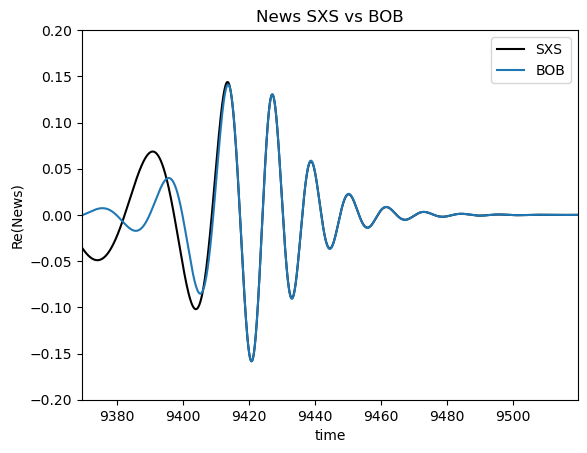

In [6]:
import matplotlib.pyplot as plt

plt.plot(t_news,y_news.real,label='SXS',color='black')
plt.plot(t_bob,y_bob.real,label='BOB')
plt.xlim(tp_news-50,tp_news+100)
plt.ylim(-0.2,0.2)
plt.xlabel('time')
plt.ylabel('Re(News)')
plt.title('News SXS vs BOB')
plt.legend()
plt.show()
